<a href="https://colab.research.google.com/github/nbeeeel/AI_Based_Isometric_Diagram_Extraction/blob/main/Auto_Encoder_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Packages and Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

**Loading Isometric and Non-Isometric Images**

In [ ]:
Isometric_Images = '/content/drive/MyDrive/ground_truth/Or'

In [ ]:
Non_Isometric = '/content/drive/MyDrive/diag'

In [ ]:
Isometric_Images = glob(Isometric_Images+'/*')

In [ ]:
Non_Isometric = glob(Non_Isometric+'/*')

**Processing the images**

In [ ]:
Isometric_Image = []
for i in Isometric_Images:
  img = cv2.imread(i,0)
  img = cv2.resize(img,(224,224))
  Isometric_Image.append(img)

In [ ]:
Non_Isometric_Img = []
for i in Non_Isometric:
  img = cv2.imread(i,0)
  img = cv2.resize(img,(224,224))
  Non_Isometric_Img.append(img)

In [ ]:
Isometric_Image = np.asarray(Isometric_Image)

In [ ]:
Non_Isometric = np.asarray(Non_Isometric_Img)

In [ ]:
Isometric_Image = np.expand_dims(Isometric_Image,axis=-1)

In [ ]:
Non_Isometric = np.expand_dims(Non_Isometric,axis=-1)

In [ ]:
Isometric_Image = Isometric_Image/255.0

In [ ]:
Non_Isometric = Non_Isometric/255.0

<function matplotlib.pyplot.show(close=None, block=None)>

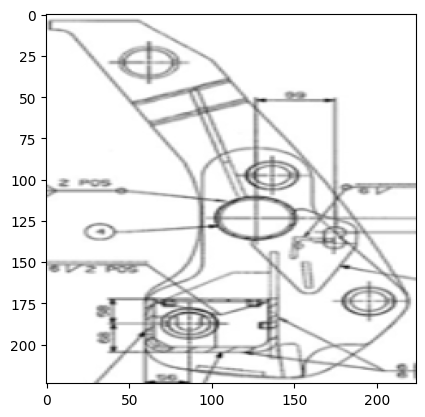

In [ ]:
plt.imshow(Non_Isometric[4],cmap='gray')
plt.show

#**Modelling**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_unet(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x1)
    x1 = layers.BatchNormalization()(x1)
    p1 = layers.MaxPooling2D((2, 2))(x1)
    p1 = layers.Dropout(0.1)(p1)  # Dropout after pooling

    x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
    x2 = layers.BatchNormalization()(x2)
    p2 = layers.MaxPooling2D((2, 2))(x2)
    p2 = layers.Dropout(0.1)(p2)  # Dropout after pooling

    x3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    x3 = layers.BatchNormalization()(x3)
    x3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
    x3 = layers.BatchNormalization()(x3)
    p3 = layers.MaxPooling2D((2, 2))(x3)
    p3 = layers.Dropout(0.1)(p3)  # Dropout after pooling

    x4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    x4 = layers.BatchNormalization()(x4)
    x4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
    x4 = layers.BatchNormalization()(x4)

    # Decoder
    u4 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x4)
    u4 = layers.concatenate([u4, x3])
    x5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    x5 = layers.BatchNormalization()(x5)
    x5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x5)
    x5 = layers.BatchNormalization()(x5)
    x5 = layers.Dropout(0.1)(x5)  # Dropout after Conv layers

    u5 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x5)
    u5 = layers.concatenate([u5, x2])
    x6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    x6 = layers.BatchNormalization()(x6)
    x6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x6)
    x6 = layers.BatchNormalization()(x6)
    x6 = layers.Dropout(0.1)(x6)  # Dropout after Conv layers

    u6 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(x6)
    u6 = layers.concatenate([u6, x1])
    x7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u6)
    x7 = layers.BatchNormalization()(x7)
    x7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x7)
    x7 = layers.BatchNormalization()(x7)
    x7 = layers.Dropout(0.1)(x7)  # Dropout after Conv layers

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x7)

    model = models.Model(inputs, outputs)
    return model

input_shape = (224, 224, 1)  # Grayscale input
autoencoder = build_unet(input_shape)
autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 16)   │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 224, 224, 16)   │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 224, 224, 16)   │          2,320 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 224, 224, 16)   │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 112, 112, 16)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 112, 112, 16)   │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 112, 112, 32)   │          4,640 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 112, 112, 32)   │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 112, 112, 32)   │          9,248 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 112, 112, 32)   │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 56, 56, 32)     │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 56, 56, 32)     │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 56, 56, 64)     │         18,496 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 56, 56, 64)     │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ batch_normalization_4… │
├──────────────────────

 Total params: 576,065 (2.20 MB)

 Trainable params: 574,657 (2.19 MB)

 Non-trainable params: 1,408 (5.50 KB)

#**Training and Evaluation**

In [ ]:
history=autoencoder.fit(Isometric_Image,Isometric_Image, epochs=100, batch_size=4, validation_split=0.1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 548ms/step - loss: 0.2335 - val_loss: 0.1966
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1674 - val_loss: 0.1770
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1379 - val_loss: 0.1552
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1241 - val_loss: 0.1326
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1110 - val_loss: 0.1132
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0995 - val_loss: 0.0966
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0951 - val_loss: 0.0824
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0849 - val_loss: 0.0698
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0793 - val_loss: 0.0596
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0717 - val_loss: 0.0513
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0721 - val_loss: 0.0449
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0595 - val_

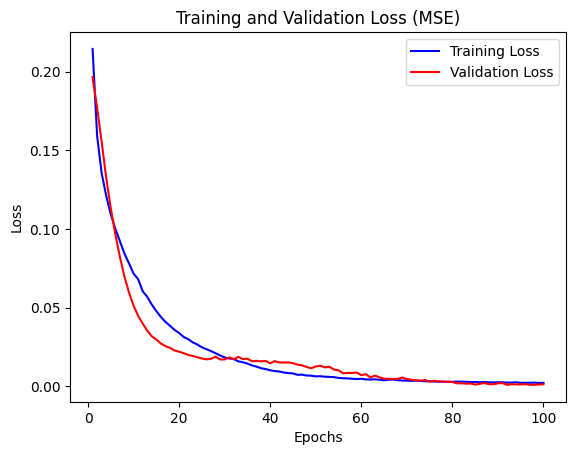

In [ ]:
# Extract loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


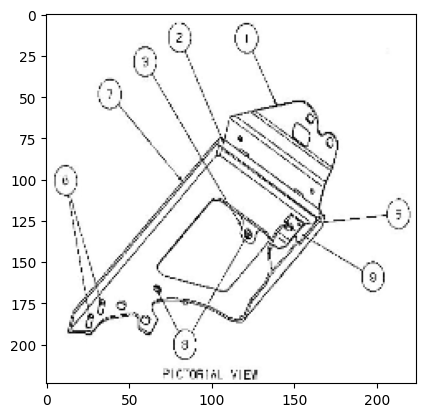

In [ ]:
plt.imshow(Isometric_Image[20],cmap='gray')

In [ ]:
img = autoencoder.predict(np.expand_dims(Isometric_Image[20],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
import numpy as np

# Assuming 'autoencoder' is your trained model and 'X_test' is your test dataset
reconstructed_images = autoencoder.predict(np.expand_dims(Non_Isometric[3],axis=0))

# Calculate reconstruction errors (e.g., Mean Squared Error)
def calculate_reconstruction_error(original, reconstructed):
    return np.mean(np.square(original - reconstructed), axis=(1, 2, 3))  # Assuming 4D images (batch_size, width, height, channels)

reconstruction_errors = calculate_reconstruction_error(Non_Isometric[3], reconstructed_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [ ]:
print("Reconstruction Error :", reconstruction_errors)

Reconstruction Error : [0.00246336]


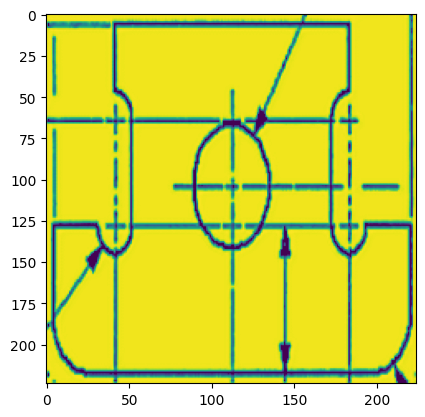

In [ ]:
plt.imshow(reconstructed_images[0])

In [ ]:
final_dataset = np.concatenate((Isometric_Image,Non_Isometric),axis=0)

In [ ]:
isometric_label = np.zeros((len(Isometric_Image),1))

In [ ]:
non_isometric_label = np.ones((len(Non_Isometric),1))

In [ ]:
final_labels =  np.concatenate((isometric_label,non_isometric_label),axis=0)

In [ ]:
# Assuming 'autoencoder' is your trained model and 'X_test' is your test dataset
reconstructed_images = autoencoder.predict(final_dataset)

# Calculate reconstruction errors (e.g., Mean Squared Error)
def calculate_reconstruction_error(original, reconstructed):
    return np.mean(np.square(original - reconstructed), axis=(1, 2, 3))  # Assuming 4D images (batch_size, width, height, channels)

reconstruction_errors = calculate_reconstruction_error(final_dataset, reconstructed_images)


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


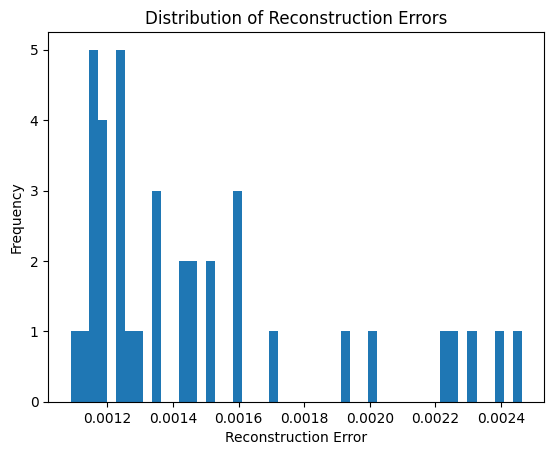

In [ ]:
# Plot the distribution of reconstruction errors
plt.hist(reconstruction_errors, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Errors')
plt.show()


In [ ]:
# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 85)  # Example: Top 5% as anomaly

# Label as 1 (anomaly) if reconstruction error > threshold, else 0 (normal)
anomaly_labels = (reconstruction_errors > threshold).astype(int)

In [ ]:
print(threshold)

0.001972243725430043


In [ ]:
# Assuming y_true contains the true labels (0 for normal, 1 for anomalies)
accuracy = accuracy_score(final_labels, anomaly_labels)
precision = precision_score(final_labels, anomaly_labels)
recall = recall_score(final_labels, anomaly_labels)
f1 = f1_score(final_labels, anomaly_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.9473684210526315
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1-Score: 0.8333333333333334


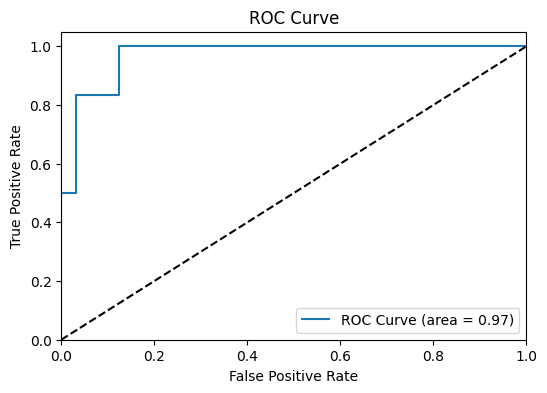

In [ ]:
fpr, tpr, thresholds = roc_curve(final_labels, reconstruction_errors)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


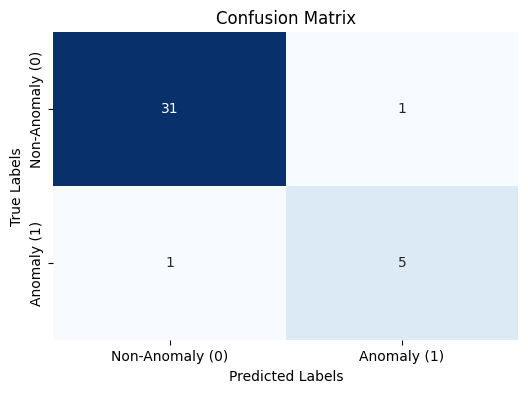

In [ ]:
# Assuming 'final_labels' are your true labels and 'anomaly_labels' are the predicted labels
cm = confusion_matrix(final_labels, anomaly_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Anomaly (0)', 'Anomaly (1)'],
            yticklabels=['Non-Anomaly (0)', 'Anomaly (1)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
